In [1]:
import psycopg2 as psql
import matplotlib.pyplot as plt
from datetime import date, timedelta

conn = psql.connect(database="incontact",user="incontact_user", password="1234", host="localhost")
conn.set_session(autocommit=True)
cur = conn.cursor()

print('ready')

ready


Daily distribution 2018


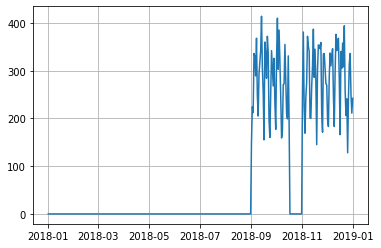

In [2]:
year = 2018

print(f"Daily distribution {year}")
query = f"""select contact_start::date, count(*) 
from calllogs_recording 
where EXTRACT(YEAR FROM contact_start) = {year}
group by contact_start::date;"""
cur.execute(query)
results = cur.fetchall()

sdate = date(year, 1, 1)   # start date
delta = date(year, 12, 31) - sdate       # as timedelta

results = {d:v for d, v in results}

for i in range(delta.days + 1):
    day = sdate + timedelta(days=i)
    if day not in results.keys():
        results[day] = 0

kv = results.items()
kv = sorted(kv)


plt.plot([x for x, y in kv], [y for x, y in kv])
plt.grid()
plt.show()

In [3]:
print(f"Get days without recordings")
query = f"""select contact_start::date, count(*) 
from calllogs_recording 
group by contact_start::date;"""
cur.execute(query)
results = cur.fetchall()

sdate = date(2018, 1, 1)
delta = date(2019, 12, 31) - sdate

results = {d:v for d, v in results}

days_without = []
for i in range(delta.days + 1):
    day = sdate + timedelta(days=i)
    if day not in results.keys():
        days_without.append(day)

for day in days_without:
    print(day.sfrtime("%Y %m %d"))

Get days without recordings
2018-01-01
2018-01-02
2018-01-03
2018-01-04
2018-01-05
2018-01-06
2018-01-07
2018-01-08
2018-01-09
2018-01-10
2018-01-11
2018-01-12
2018-01-13
2018-01-14
2018-01-15
2018-01-16
2018-01-17
2018-01-18
2018-01-19
2018-01-20
2018-01-21
2018-01-22
2018-01-23
2018-01-24
2018-01-25
2018-01-26
2018-01-27
2018-01-28
2018-01-29
2018-01-30
2018-01-31
2018-02-01
2018-02-02
2018-02-03
2018-02-04
2018-02-05
2018-02-06
2018-02-07
2018-02-08
2018-02-09
2018-02-10
2018-02-11
2018-02-12
2018-02-13
2018-02-14
2018-02-15
2018-02-16
2018-02-17
2018-02-18
2018-02-19
2018-02-20
2018-02-21
2018-02-22
2018-02-23
2018-02-24
2018-02-25
2018-02-26
2018-02-27
2018-02-28
2018-03-01
2018-03-02
2018-03-03
2018-03-04
2018-03-05
2018-03-06
2018-03-07
2018-03-08
2018-03-09
2018-03-10
2018-03-11
2018-03-12
2018-03-13
2018-03-14
2018-03-15
2018-03-16
2018-03-17
2018-03-18
2018-03-19
2018-03-20
2018-03-21
2018-03-22
2018-03-23
2018-03-24
2018-03-25
2018-03-26
2018-03-27
2018-03-28
2018-03-29
2018